In [1]:
import ROOT

Welcome to JupyROOT 6.26/02


# access file data.root and read the ttree in

In [2]:
inputFile =  ROOT.TFile("data.root")
tree = inputFile.Get("sig")

# create the sum of an exponential and a gaussian to fit the data

In [3]:
x = ROOT.RooRealVar("x", "x", 0., 1000.);
oneovertau = ROOT.RooRealVar("oneovertau", "oneovertau", -0.02, -0.1, -0.003)
sigma = ROOT.RooRealVar("sigma", "sigma", 1., 0.001, 10.)
mass = ROOT.RooRealVar("mass", "mass",  114., 200.)
nbkg = ROOT.RooRealVar("nbkg", "nbkg", 10000., 50000.)
nsig = ROOT.RooRealVar("nsig", "nsig", 1000., 3000.)
expo = ROOT.RooExponential("expo","expoonential function", x, oneovertau)
gaus = ROOT.RooGaussian("gaus", "gaussian function", x, mass, sigma)
modelSB = ROOT.RooAddPdf("modelSB","modelSB", ROOT.RooArgList(gaus,expo), ROOT.RooArgList(nsig,nbkg))

# convert the ttree in a RooDataset

In [4]:
data = ROOT.RooDataSet("data","dataset with x", tree, ROOT.RooArgSet(x))
data.Print()

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #13390 because x cannot accommodate the value 1396.81
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #31771 because x cannot accommodate the value 1038.39
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 2 out-of-range events
RooDataSet::data[x] = 39934 entries


In [5]:
modelSB.fitTo(data, ROOT.RooFit.Minos(True))

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaus,expo)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mass         1.57000e+02  8.60000e+00    1.14000e+02  2.00000e+02
     2 nbkg         3.00000e+04  4.00000e+03    1.00000e+04  5.00000e+04
     3 nsig         2.00000e+03  2.00000e+02    1.00000e+03  3.00000e+03
     4 oneovertau  -2.00000e-02  8.50000e-03   -1.00000e-01 -3.00000e-03
     5 sigma        1.00000e+00  4.99500e-01    1.00000e-03  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR

[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) directly selected PDF components: (expo)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) directly selected PDF components: (gaus)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(modelSB) indirectly selected PDF components: ()


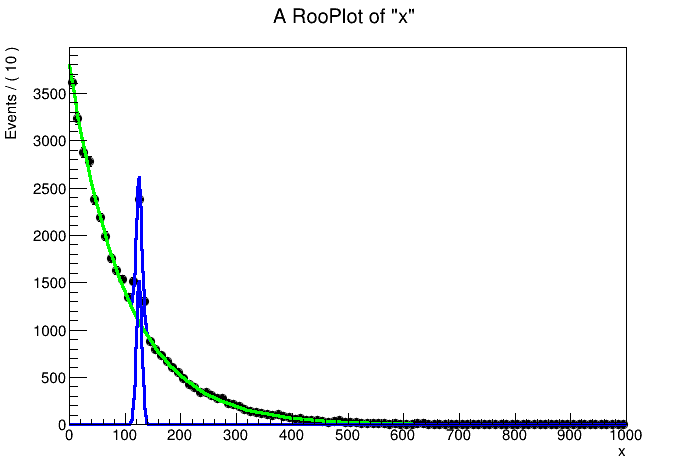

In [8]:
frame = x.frame()
data.plotOn(frame)
modelSB.plotOn(frame)
modelSB.plotOn(frame, ROOT.RooFit.Components("expo"), ROOT.RooFit.LineColor(3))
modelSB.plotOn(frame, ROOT.RooFit.Components("gaus"), ROOT.RooFit.LineColor(4))

frame.Draw()
ROOT.gPad.Draw()

In [9]:
nll = modelSB.createNLL(data)

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.


In [10]:
profile = nll.createProfile(mass)

[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_data_Profile[mass]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_data_Profile[mass]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_modelSB_data_Profile[mass]) minimum found at (mass=125.026)
..................................................................................

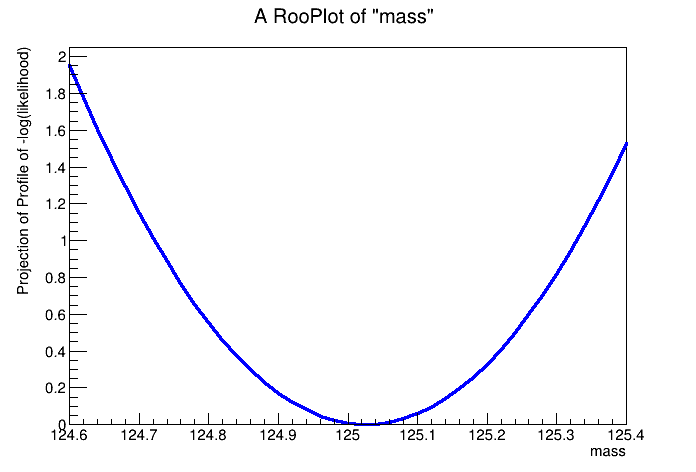

In [12]:
frame_mll = mass.frame(ROOT.RooFit.Range(124.6, 125.4), ROOT.RooFit.Bins(20))
profile.plotOn(frame_mll)

frame_mll.Draw()
ROOT.gPad.Draw()